In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns

df = pd.read_csv('../wine_quality/WineQT.csv')
df.head()

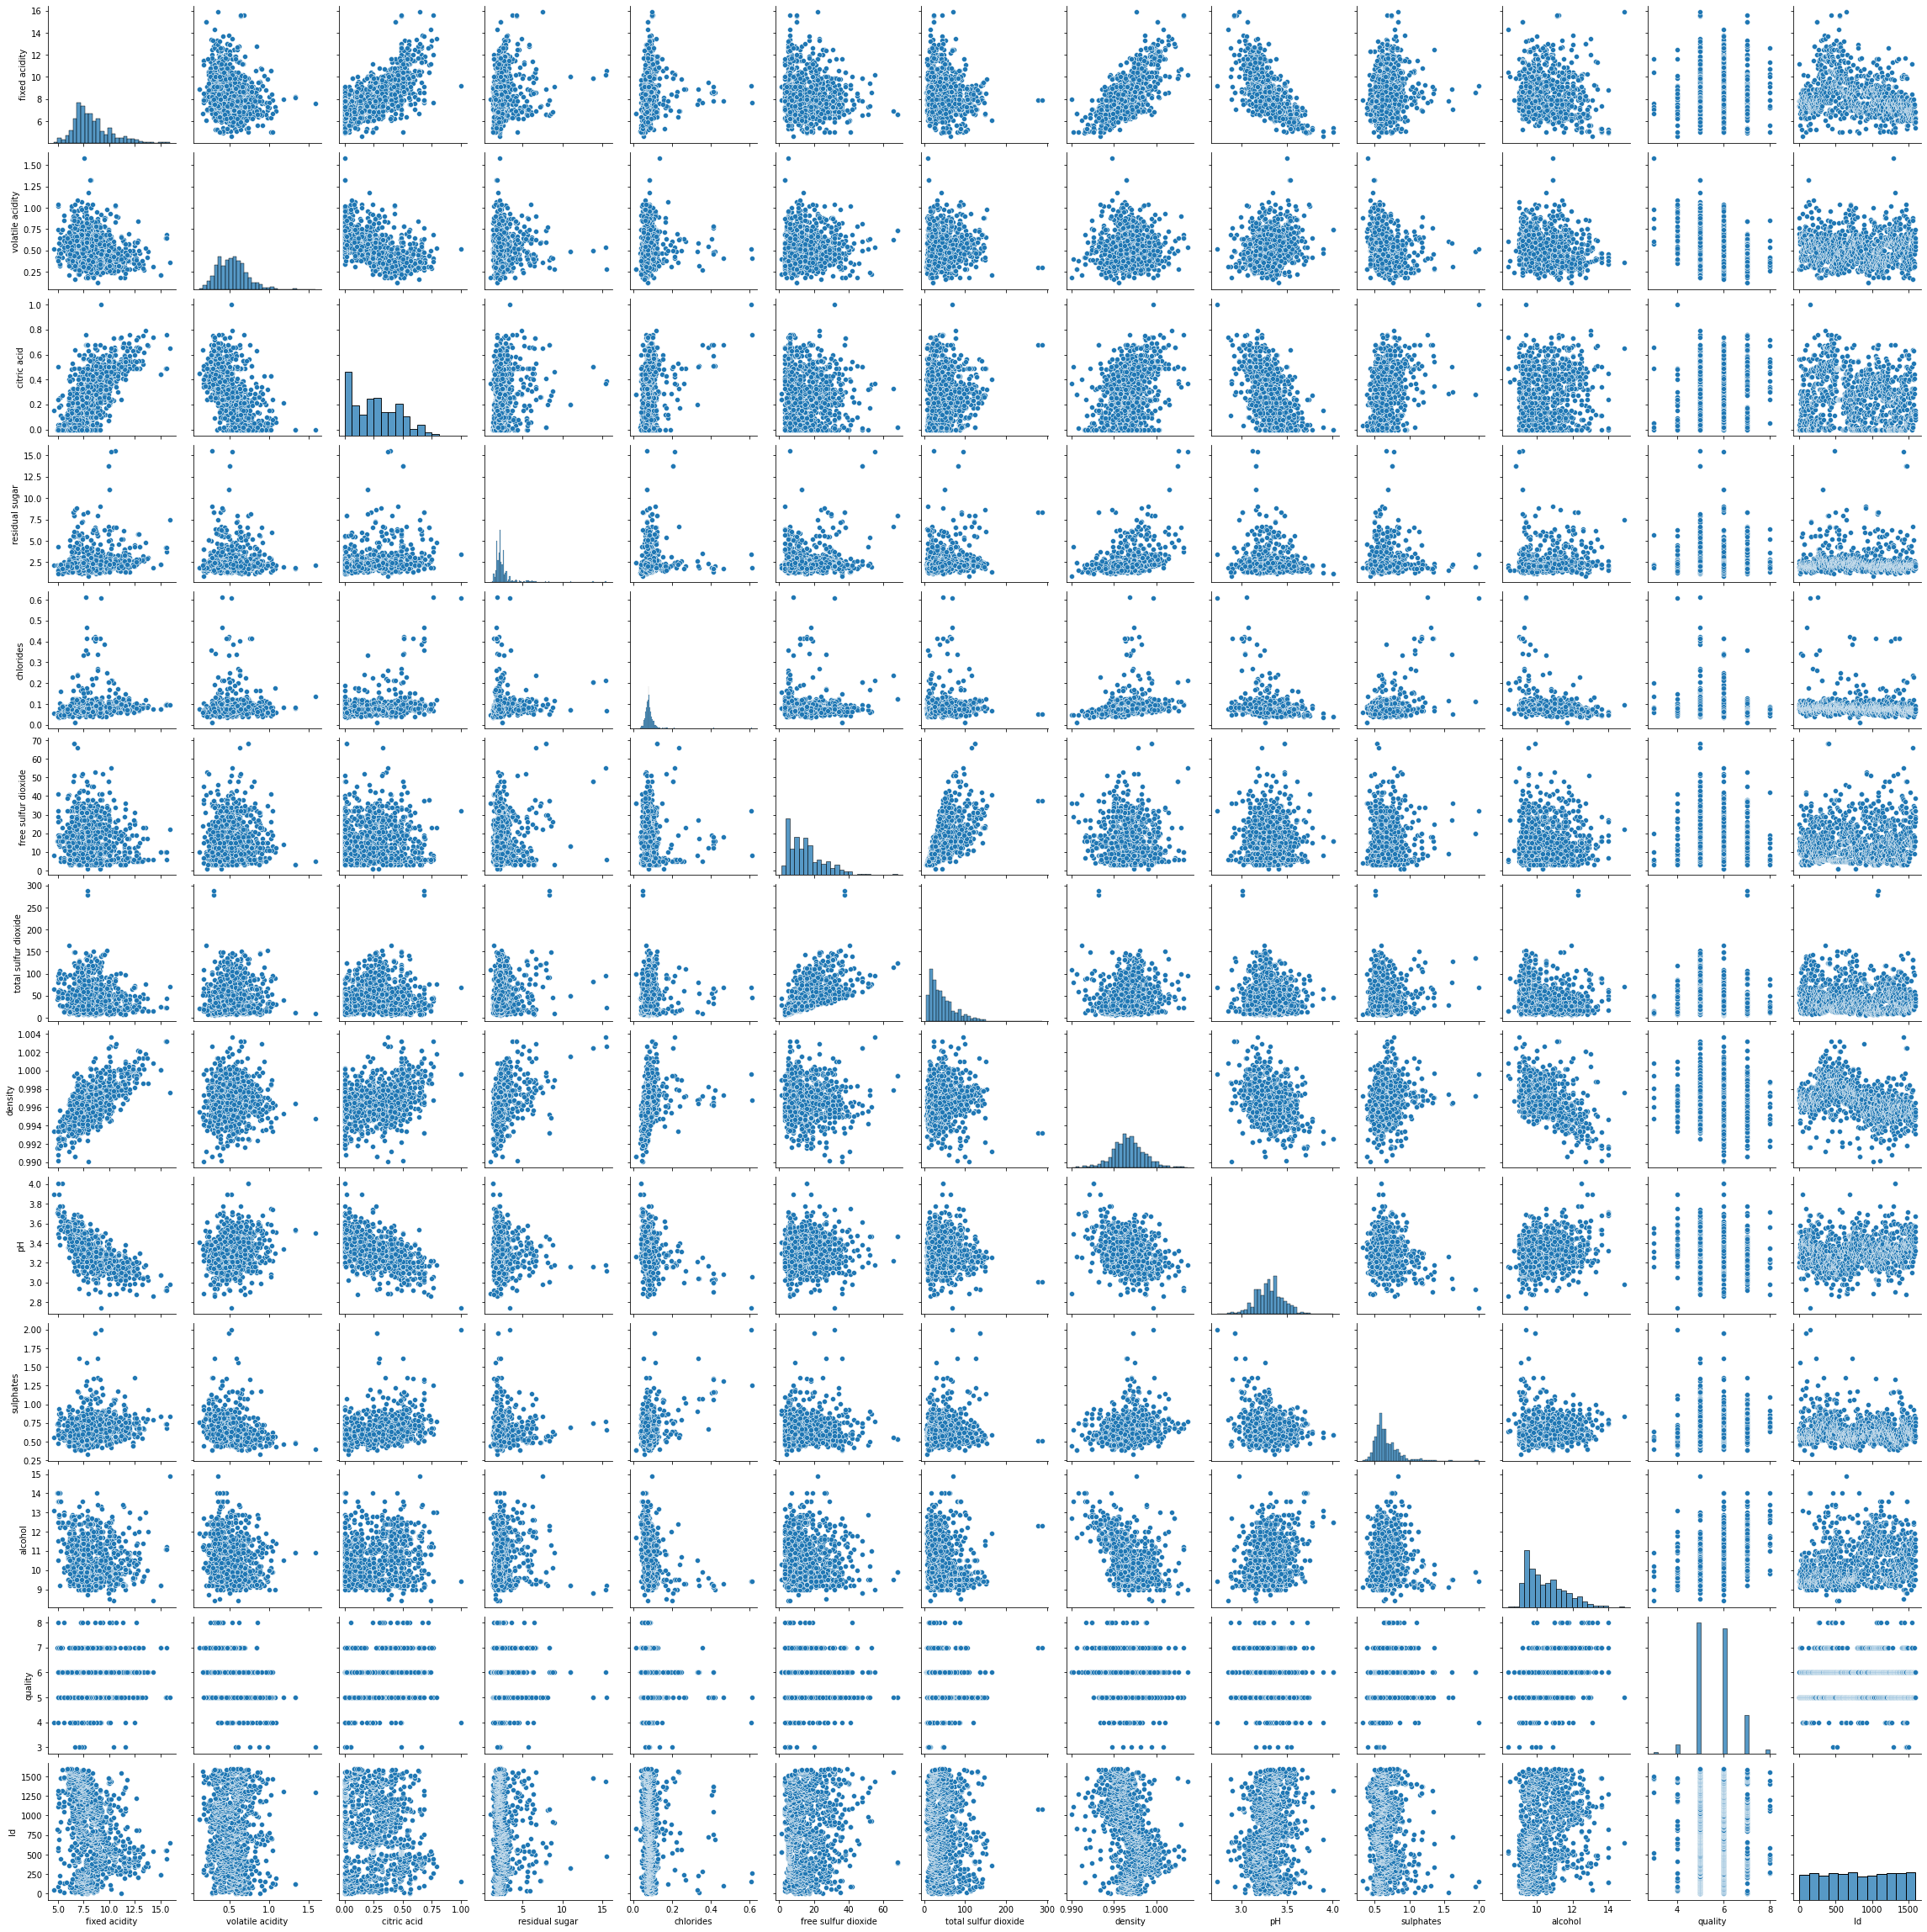

In [2]:
sns.pairplot(df)
#show graph
plt.show()

In [3]:
X = df.drop(['Id','quality'],axis=1)
y = df.quality

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

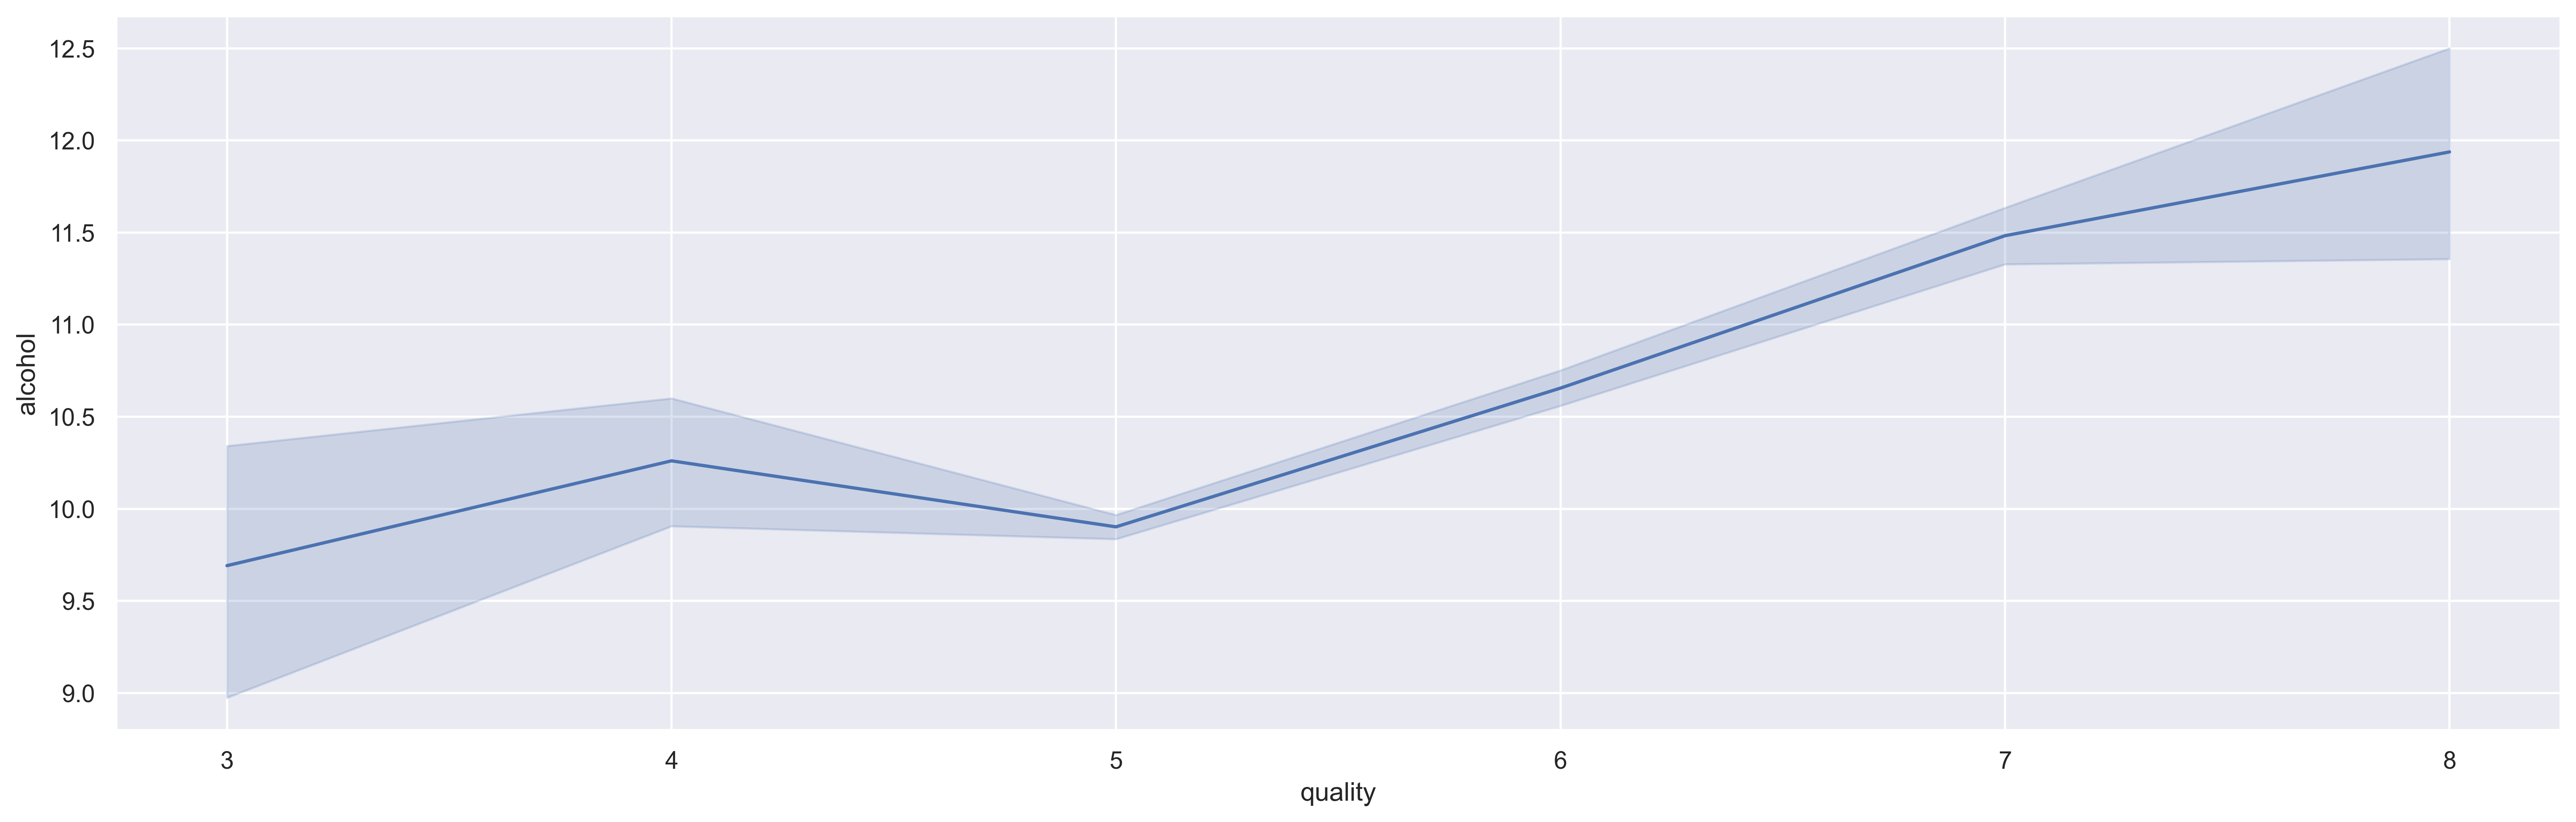

In [4]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.lineplot( x = 'quality',  y = 'alcohol', data = df)



<AxesSubplot:xlabel='quality', ylabel='pH'>

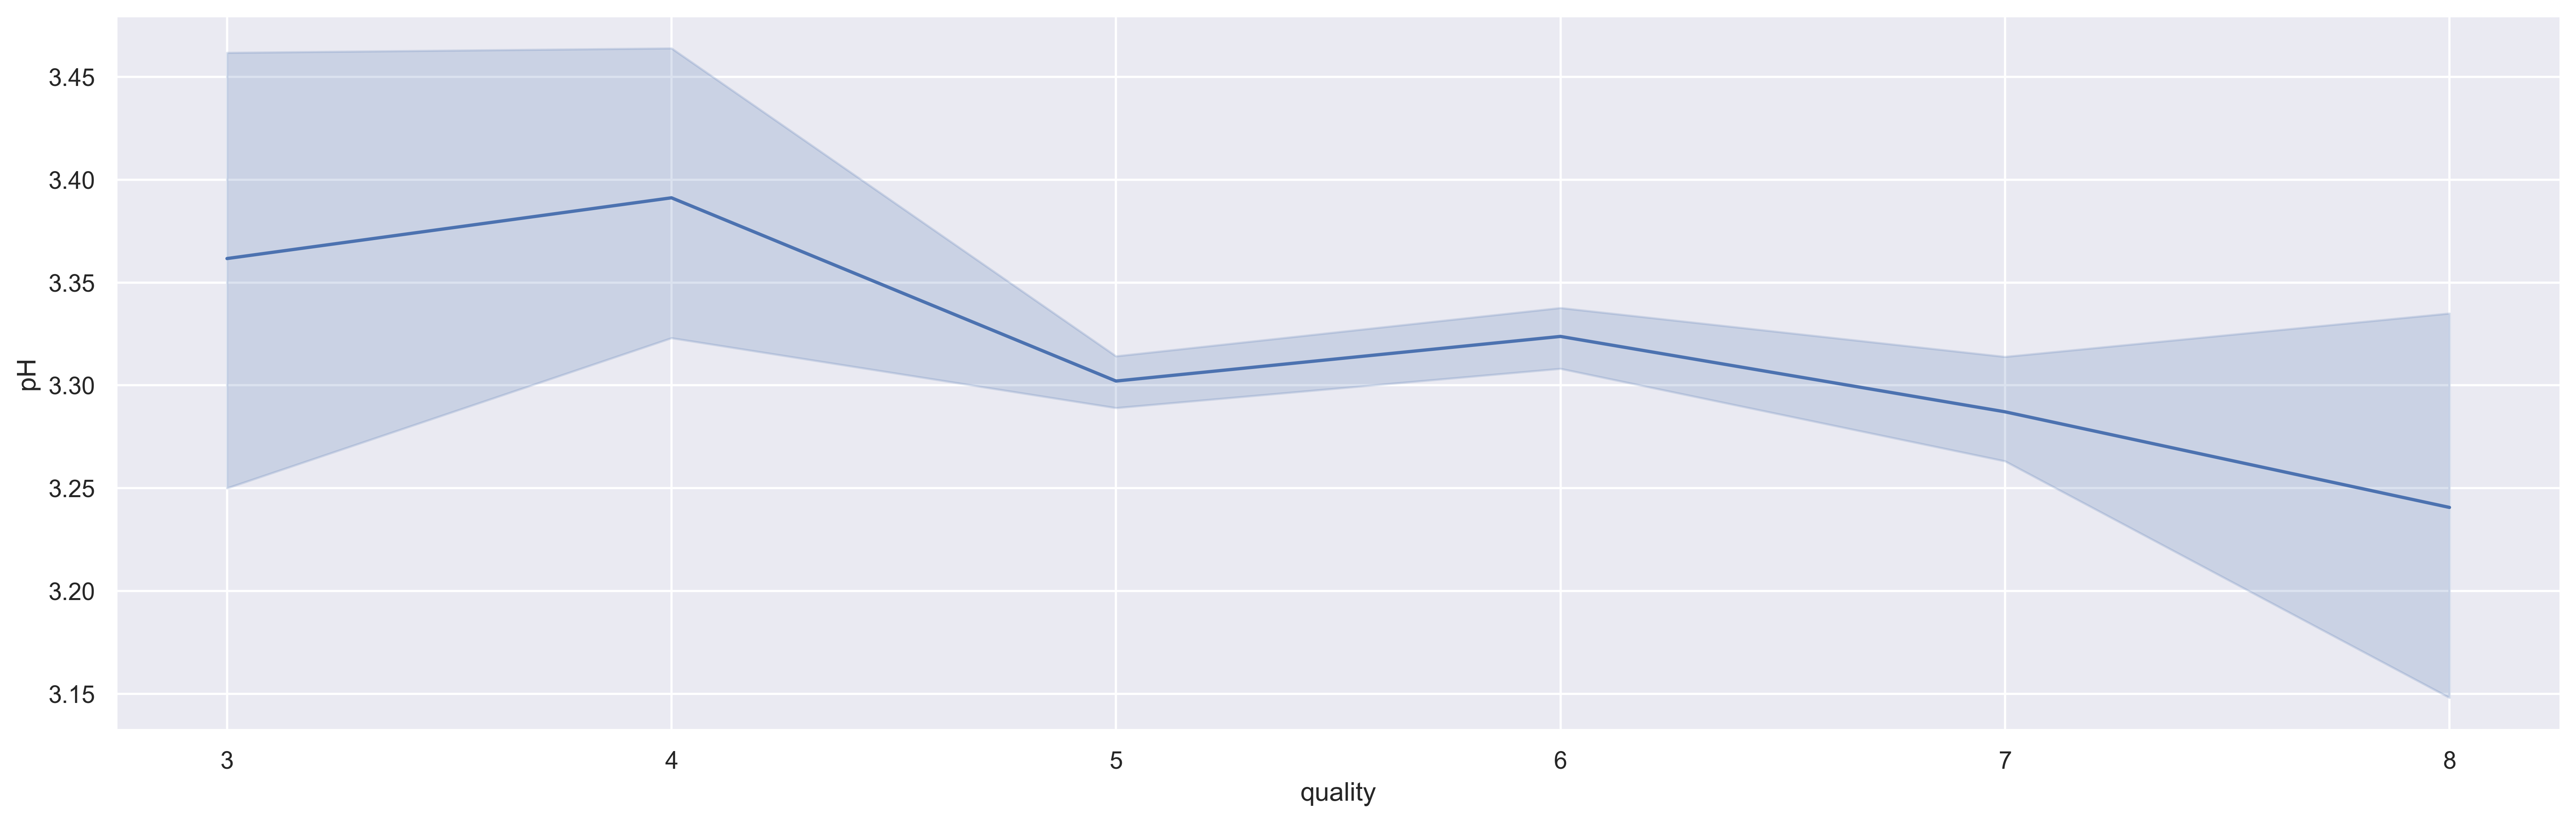

In [5]:
sns.set()
plt.figure(figsize = (20,6), dpi = 400)
sns.lineplot( x = 'quality',  y = 'pH', data = df)

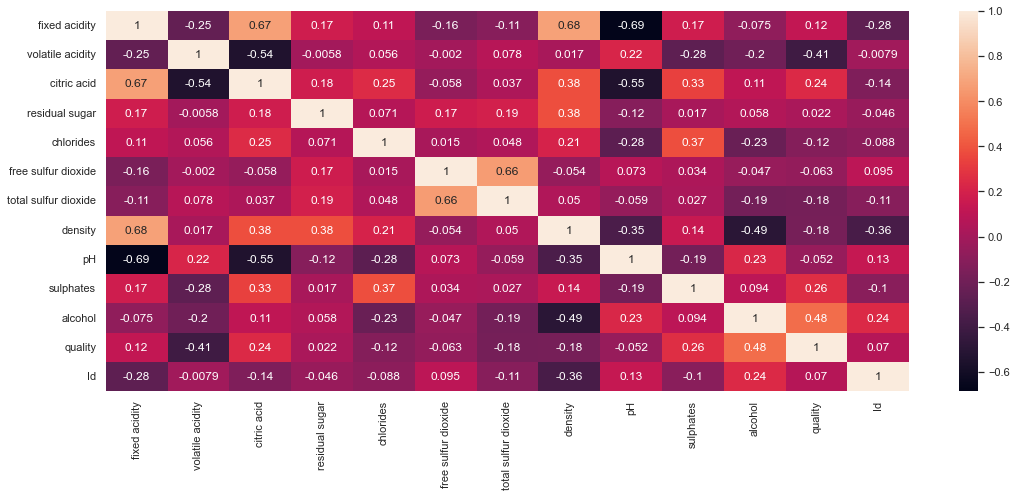

In [6]:
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(df.corr(),annot=True)
plt.show()

In [7]:

colm = []
# loop for columns
for i in range(len(df.corr().keys())):
    for j in range(j):
        if abs(df.corr().iloc[i,j]) > 0.7:
            colm = df.corr().columns[i]


NameError: name 'j' is not defined

In [ ]:
sum_corr = df.corr().sum().sort_values(ascending=True)
sum_corr

In [ ]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.68)]
to_drop
# Drop features 
#df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.update(df.fillna(df.mean()))

In [ ]:
df
cat = df.select_dtypes(include='O')
#cat
# create dummies of categorical columns
df_dummies = pd.get_dummies(df,drop_first = True)
print(df_dummies)

In [ ]:
df_dummies['best quality']=[1 if x>=7 else 0 for x in df.quality]
print(df_dummies)
df_dummies[df_dummies['best quality']>0]

In [ ]:
from sklearn.model_selection import train_test_split
 
# independent variables
X = df_dummies.drop(['quality','best quality'],axis=1)
# dependent variable
y = df_dummies['best quality']
 
# creating train test splits
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(xtrain)
scal_xtrain = norm_fit.transform(xtrain)
scal_xtest = norm_fit.transform(xtest)
print(scal_xtrain)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
rnd = RandomForestClassifier()
# fit the model
fit_rnd = rnd.fit(scal_xtrain,ytrain)
# checking the accuracy score

y_predict = rnd.predict(scal_xtest)
rnd_score = rnd.score(scal_xtest,ytest)
print('score of model is : ',rnd_score)
x_predict
print(classification_report(ytest,y_predict))


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(RandomForestClassifier(n_estimators=80),X,y,cv=cv)

In [ ]:
from sklearn.metrics import confusion_matrix
#model = SVC(kernel='poly')
model= RandomForestClassifier(n_estimators=80)

cm = confusion_matrix(ytest,y_predict)
cm

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

def find_best_model_using_gridsearch_cv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params':{
                'normalize' : [True,False]
            }
        },
        'lasso' : {
            'model': Lasso(),
            'params':{
                'alpha' : [1,2],
                'selection': ['random','cyclic']
            }
        },
        'random_tree' : {
            'model': RandomForestClassifier(),
            'params':{
                'n_estimators' : [100]
                
            }
            
        },
        'svc' : {
            'model': SVC(),
            'params':{
                'kernel' : [ 'poly']
                
            }
            
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name , config in algos.items():
        gs= GridSearchCV(config['model'], config['params'], cv=cv, return_train_score= False) 
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearch_cv(X,y)        